In [ ]:
import keras
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv').iloc[:,:].values
mnist

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = mnist[:,0]
x = mnist[:,1:]
y

array([5, 7, 9, ..., 2, 9, 5])

In [ ]:
y_ = to_categorical(y)
print(y_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_.shape

(19999, 10)

In [ ]:
temp = x[0]
temp.shape

(784,)

In [ ]:
temp = temp.reshape(28,28)
temp.shape

(28, 28)

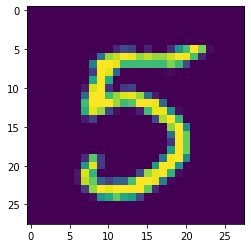

In [ ]:
plt.imshow(temp)

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=784, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10,  activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               50200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 272,110
Trainable params: 272,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y_,shuffle = True, test_size = 0.1)

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=80,batch_size =150)

Train on 17999 samples, validate on 2000 samples
Epoch 1/80
17999/17999 [==============================] - 2s 102us/step - loss: 3.0486 - accuracy: 0.7569 - val_loss: 0.5409 - val_accuracy: 0.8710
Epoch 2/80
17999/17999 [==============================] - 1s 82us/step - loss: 0.3683 - accuracy: 0.9077 - val_loss: 0.4034 - val_accuracy: 0.9015
Epoch 3/80
17999/17999 [==============================] - 1s 81us/step - loss: 0.2183 - accuracy: 0.9399 - val_loss: 0.3548 - val_accuracy: 0.9170
Epoch 4/80
17999/17999 [==============================] - 1s 81us/step - loss: 0.1467 - accuracy: 0.9585 - val_loss: 0.3350 - val_accuracy: 0.9250
Epoch 5/80
17999/17999 [==============================] - 1s 81us/step - loss: 0.0874 - accuracy: 0.9739 - val_loss: 0.3457 - val_accuracy: 0.9255
Epoch 6/80
17999/17999 [==============================] - 1s 80us/step - loss: 0.0703 - accuracy: 0.9798 - val_loss: 0.3539 - val_accuracy: 0.9320
Epoch 7/80
17999/17999 [==============================] - 1s 81us/st

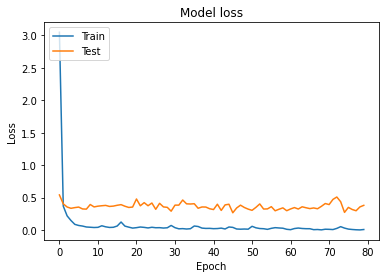

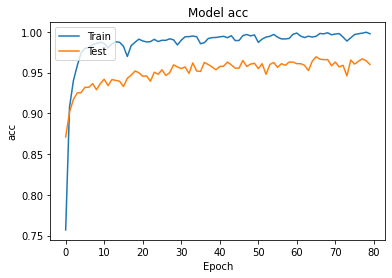

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_data = pd.read_csv('/content/sample_data/mnist_test.csv').iloc[:,:].values
test_y = test_data[:,0]
test_x = test_data[:,1:]
test_y

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
pred = model.predict(test_x)

In [ ]:
pred[0]

array([4.34239529e-22, 1.19688852e-16, 1.00000000e+00, 2.25886797e-14,
       0.00000000e+00, 2.62035854e-21, 5.28288067e-21, 1.38278705e-14,
       6.85719814e-11, 0.00000000e+00], dtype=float32)

In [ ]:
temp = []
for i in pred:
  temp.append(np.argmax(i))
temp = np.array(temp)

In [ ]:
temp

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
acc = accuracy_score(temp, test_y)
print(acc)

0.9640964096409641


In [ ]:
wrong = []
for i in range (len(test_y)):
  if test_y[i] != temp[i]:
     wrong.append(i)
print(wrong)   

[7, 32, 60, 120, 148, 150, 157, 216, 231, 232, 240, 246, 258, 273, 281, 289, 319, 320, 339, 351, 380, 444, 446, 447, 494, 550, 581, 590, 609, 618, 683, 690, 709, 716, 759, 812, 843, 899, 937, 950, 955, 964, 1013, 1038, 1051, 1054, 1106, 1111, 1158, 1165, 1177, 1180, 1181, 1193, 1203, 1225, 1231, 1241, 1246, 1247, 1269, 1298, 1309, 1318, 1325, 1327, 1392, 1421, 1443, 1493, 1521, 1522, 1524, 1529, 1548, 1552, 1608, 1669, 1677, 1680, 1685, 1708, 1716, 1731, 1736, 1750, 1753, 1768, 1772, 1821, 1827, 1849, 1877, 1879, 1882, 1908, 1972, 1980, 2015, 2017, 2023, 2034, 2042, 2052, 2069, 2092, 2097, 2106, 2108, 2120, 2129, 2134, 2147, 2181, 2214, 2223, 2265, 2271, 2292, 2297, 2298, 2324, 2357, 2368, 2370, 2371, 2386, 2405, 2436, 2446, 2453, 2472, 2487, 2588, 2596, 2597, 2616, 2647, 2653, 2720, 2729, 2783, 2809, 2822, 2835, 2862, 2876, 2895, 2906, 2918, 2920, 2926, 2938, 2969, 3004, 3022, 3029, 3059, 3061, 3072, 3113, 3114, 3116, 3129, 3205, 3239, 3262, 3288, 3315, 3329, 3383, 3387, 3404, 3474, 3

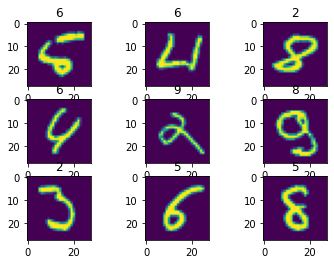

In [ ]:
for i in range(1,10):
  pos = wrong[i-1]
  plt.subplot(3,3,i)
  plt.imshow(test_x[pos].reshape(28,28))
  plt.title(temp[pos])